#  
## Titanic Survival Predictions
In this dataset, you will train a logistic regression model that can predict the survivors based on a set of features about the passenger. Start first by taking sometime to understand your data. You can find more info about the data and its breakdown in this link https://www.kaggle.com/c/titanic/data

### Start with Data Exploring
Your data is split into two files. One for training and one for testing. Load both and find out the number of samples and features in each file

In [1]:
import numpy as np
import pandas as pd
df_training = pd.read_csv('train.csv')
df_testing = pd.read_csv('test.csv')

How many survivors in the traning set?

In [2]:
print('number of survivors', df_training.Survived.sum())

number of survivors 342


Can you find Jack and Rose in the data? Use a code. You probably won't find them as they were fictional charachter. See if you can find Beatrice Irene Sandstorm? Read here about her https://www.encyclopedia-titanica.org/titanic-survivor/beatrice-irene-sandstrom.html

In [3]:
# check train and test sets for name = Jack
print(df_training[df_training['Name']=='Jack'].Name) if all(df_training['Name']=='Jack') else print("Jack is not in the training data")
print(df_testing[df_testing['Name']=='Jack'].Name) if all(df_testing['Name']=='Jack') else print("Jack is not in the testing data")

# you can also do that 
print(df_training[df_training['Name']=='Rose'].Name)
print(df_testing[df_testing['Name']=='Rose'].Name)

# check train and test sets for name contains Beatrice
df_training[df_training['Name']. str.contains('Beatrice')].Name
df_testing[df_testing['Name']. str.contains('Beatrice')].Name


Jack is not in the training data
Jack is not in the testing data
Series([], Name: Name, dtype: object)
Series([], Name: Name, dtype: object)


117    Sandstrom, Miss. Beatrice Irene
Name: Name, dtype: object

### Does features make difference?
In the training dataset 
- Pclass - Usually, higher class (class 1) meant a more expensive fare and the other classes paid lesser to be on the ship. What was the survival rate per class?
- Sex — What was the survival rate of women?
- SibSp — What was the survival rate based on number of siblings the passenger had on the ship?
- Parch — What was the survival rate based on number of parents/children the passenger had on the ship?

In [4]:
# survival rate per class (devide how many survived per class by how many people belonged to this class)
print(df_training.groupby('Pclass').Survived.sum()/df_training.groupby('Pclass').Survived.count())
# survival rate per Sex
print(df_training.groupby('Sex').Survived.sum()/df_training.groupby('Sex').Survived.count())
# survival rate per Siblings
print(df_training.groupby('SibSp').Survived.sum()/df_training.groupby('SibSp').Survived.count())
# survival rate per Parent/child
print(df_training.groupby('Parch').Survived.sum()/df_training.groupby('Parch').Survived.count())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


Plot two histogram based on the age. One for the survivors and other for non survivors. According to the histogram was Jack more likely to survive or not survive and why?

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Age histograms for non survivors')

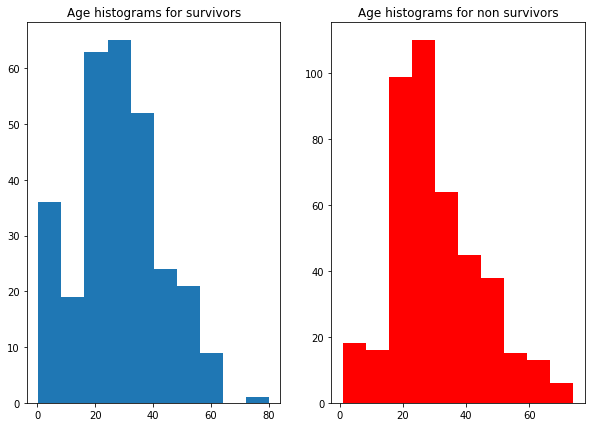

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,7])
plt.subplot(121)
plt.hist(df_training.Age[df_training.Survived==True])
plt.title('Age histograms for survivors')
plt.subplot(122)
plt.hist(df_training.Age[df_training.Survived==False], color='r')
plt.title('Age histograms for non survivors')

Divide the age histograms on a 3 X 2 subplots. Left column is for non survival data and the right one is for survivors. Each row is for one of the three PClasses

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf522b0>,
      dtype=object)

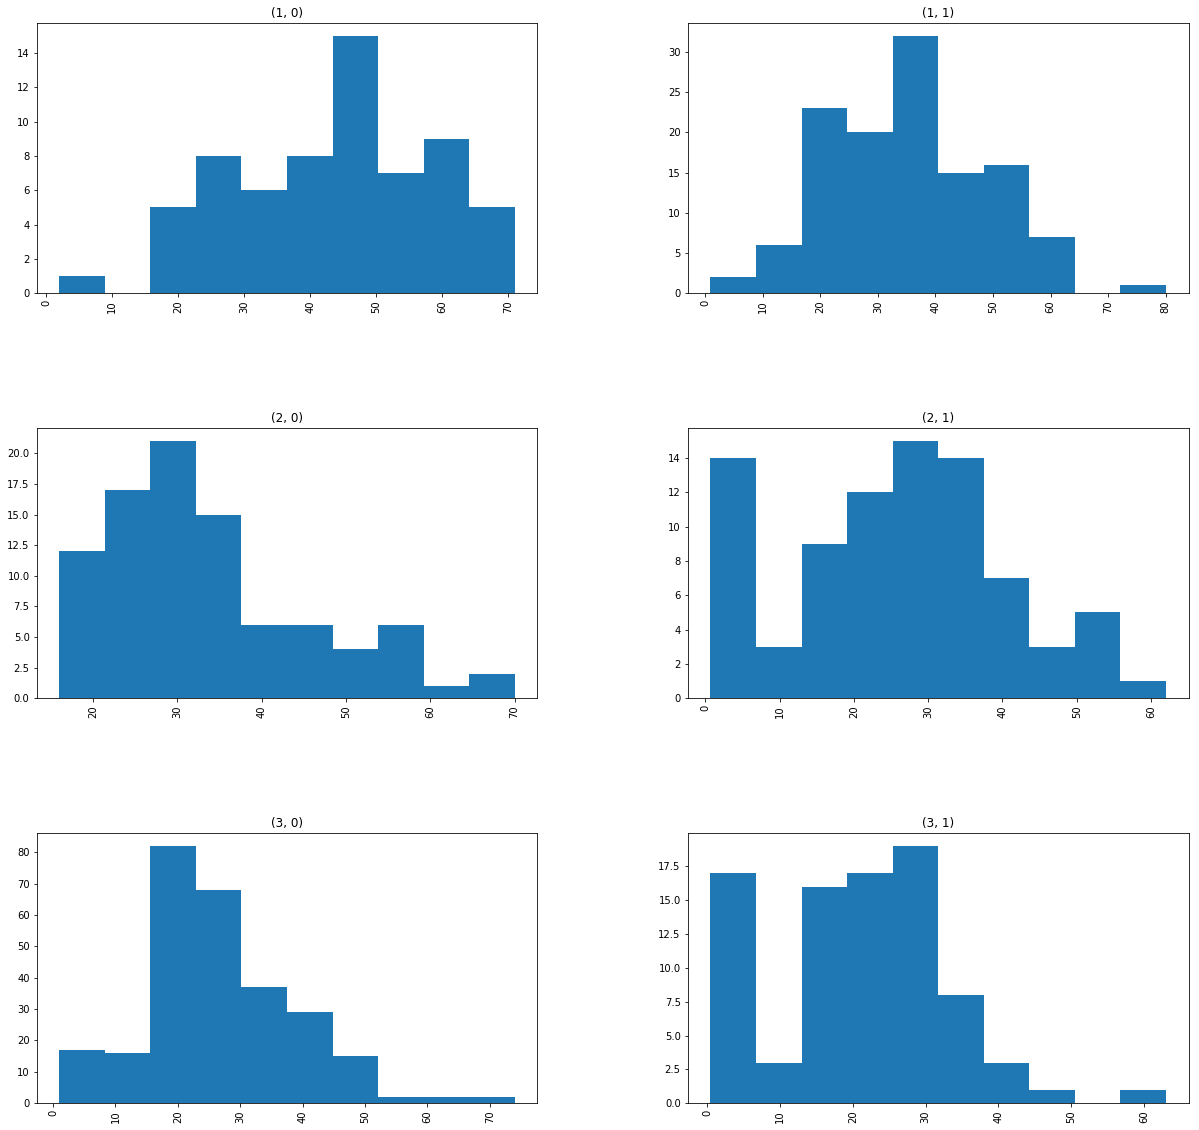

In [6]:
df_training.Age.hist(by=[df_training['Pclass'],df_training['Survived']],figsize=(20,20))

## Fix missing Data in the Training Dataset
Which features in the training contains missing values? and how many missing values are there?

In [7]:
df_training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Find out the age median grouped by PClass and gender. Clean up the data by substituting the nans by the median from the corresponding PClass and gender

In [8]:
median_grouped = df_training.groupby(by=['Pclass', 'Sex']).Age.median()
print(median_grouped)
# replace .. using a for loop that picks nan elements from each pclass I am replacing the male and female ages
for p in df_training.Pclass.unique(): 
    df_training.Age[(df_training.Pclass==p) & (df_training.Age.isna()) & (df_training.Sex=='male')] = median_grouped[p]['male']
    df_training.Age[(df_training.Pclass==p) & (df_training.Age.isna()) & (df_training.Sex=='female')] = median_grouped[p]['female']   
#Checking if we still have any nans in age
print('number of nans in age is ', df_training.Age.isna().sum())

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


number of nans in age is  0


For the Embarked column, substitute the missing value with the highest occurance value among the entire dataset

In [9]:
df_training.Embarked[df_training.Embarked.isna()]=df_training.Embarked.value_counts().idxmax()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Let's do our Model
Cabin, Name, ticket and Passenger Id are not important to our ML model. Let's get rid of them

In [10]:
df_training.drop(columns=['Cabin','Name','Ticket','PassengerId'], inplace=True)

Make sure now that your data does not have any nulls

In [11]:
df_training.isna().sum() 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

We need to convert some of our features to categories and numbers instead of letters as logistic regression model won't be able to decode them. Map the embarked variable into 0,1, and 2 and the sex variable into 0 and 1

% hint: `df_train['Embarked'].astype('category').cat.codes`

In [12]:
# convert categories into numerical values
df_training.Embarked = df_training.Embarked.astype('category').cat.codes
df_training.Sex = df_training.Sex.astype('category').cat.codes

You are now ready to build a logistic regression model and fit it 

In [13]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_training.drop(columns=['Survived'])
y = df_training.Survived
scaler=StandardScaler().fit(X)
x_scaled=scaler.transform(X)
my_model = LogisticRegression().fit(x_scaled, y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Show the training score. 

In [14]:
my_model.score(x_scaled,y)

0.8080808080808081

What are the coefficients. Make a plot that shows the importance of each feature in your model

coefficient and bias are : [[-0.97497661 -1.27988999 -0.56637168 -0.37452556 -0.07090765  0.09214013
  -0.15339128]] and [-0.64209731]


<BarContainer object of 7 artists>

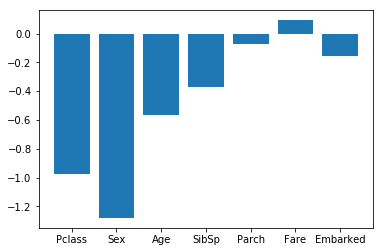

In [15]:
print('coefficient and bias are :',my_model.coef_,'and', my_model.intercept_) # print w and b
# bar plot to show the importance
plt.bar(X.columns, my_model.coef_[0])

Use the logistic regression model on the test data to predict who will survive. You may need to do same cleaning you have done in the training data to the test data

In [16]:
for p in df_testing.Pclass.unique(): 
    df_testing.Age[(df_testing.Pclass==p) & (df_testing.Age.isna()) & (df_testing.Sex=='male')] = median_grouped[p]['male']
    df_testing.Age[(df_testing.Pclass==p) & (df_testing.Age.isna()) & (df_testing.Sex=='female')] = median_grouped[p]['female']   
df_testing.Embarked[df_testing.Embarked.isna()]=df_training.Embarked.value_counts().idxmax()
df_testing.drop(columns=['Cabin','Name','Ticket','PassengerId'], inplace=True)
df_testing.Embarked = df_testing.Embarked.astype('category').cat.codes
df_testing.Sex = df_testing.Sex.astype('category').cat.codes
print(df_testing.isna().sum())
df_testing.dropna(inplace=True)
print(df_testing.isna().sum())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
x_scaled_test=scaler.transform(df_testing)
pred = my_model.predict(x_scaled_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


How many will survive from the test dataset?

In [21]:
print('number of survivors in the test is ', sum(pred), 'out of', len(pred))

number of survivors in the test is  156 out of 417
